# Adathalmaz leírása

A vizsgált csoport három különböző búzafajta (*Kama*, *Rosa* és *Canadian*) szemcséiből állt, mindegyikből **70 mintát** választottak ki véletlenszerűen a kísérlethez.

A szemek belső szerkezetének magas minőségű megjelenítését egy **lágy röntgensugaras technikával** végezték. Ez a módszer:

- Roncsolásmentes
- Jelentősen olcsóbb, mint más fejlettebb képalkotó technikák, például a pásztázó mikroszkópia vagy lézeres technológia

A felvételeket **13x18 cm-es KODAK röntgenlemezeken** rögzítették.

A vizsgálatokat kombájnnal betakarított búzaszemekkel végezték, amelyek a **Lengyel Tudományos Akadémia Agrofizikai Intézetének** (Lublin) kísérleti földjeiről származtak.

> Az adathalmaz **klasszifikációs** (osztályozási) és **klaszterezési** (csoportosítási) feladatokra is alkalmas.

---

# Attribútumok

A búzaszemekről hét geometriai jellemzőt mértek:

1. **Terület** (`area`, *A*)
2. **Kerület** (`perimeter`, *P*)
3. **Kompaktság (Búzaszem alakja)**  
   `compactness = (4 * π * A) / P²`
4. **A szem hosszúsága** (`length of kernel`)
5. **A szem szélessége** (`width of kernel`)
6. **Aszimmetria együttható (mennyire szimmetrikus a búzaszem)** (`asymmetry coefficient`)
7. **Barázda hosszúsága** (`length of kernel groove`)

- Minden fenti attribútum **folytonos, valós számértékű**.

8. **Osztályozási címke** (`classification`) – a búzafajta neve:  
   `Kama`, `Rosa` vagy `Canadian`


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('data_16.csv', skiprows=1, names=['terulet', 'kerulet', 'kompaktsag', 'szemhossz', 'szem_szelesseg',
                                      'asszimetria_egyutthato', 'barazdahossz', 'osztalycimke'])

df['buza_fajtaja'] = df['osztalycimke'].replace(1,'Kama') \
                              .replace(2,'Rosa') \
                              .replace(3,'Canadian')
                        
df.head()

,terulet,kerulet,kompaktsag,szemhossz,szem_szelesseg,asszimetria_egyutthato,barazdahossz,osztalycimke,buza_fajtaja
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   terulet                 210 non-null    float64
 1   kerulet                 210 non-null    float64
 2   kompaktsag              210 non-null    float64
 3   szemhossz               210 non-null    float64
 4   szem_szelesseg          210 non-null    float64
 5   asszimetria_egyutthato  210 non-null    float64
 6   barazdahossz            210 non-null    float64
 7   osztalycimke            210 non-null    int64  
 8   buza_fajtaja            210 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 14.9+ KB


In [4]:
df.describe()

,terulet,kerulet,kompaktsag,szemhossz,szem_szelesseg,asszimetria_egyutthato,barazdahossz,osztalycimke
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


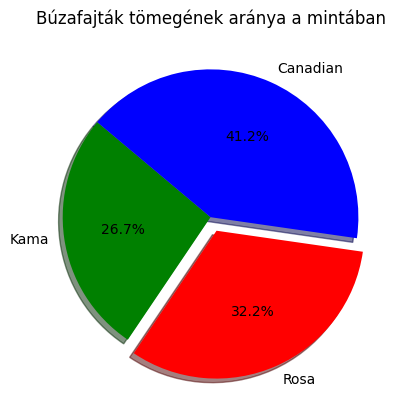

In [5]:
labels = df['buza_fajtaja'].unique().tolist()
sizes = df.groupby('buza_fajtaja')['terulet'].sum().tolist()
colors = ['green', 'red', 'blue']
explode = (0, 0.1, 0)  # A Rosa kicsit kiemelve

# Kördiagram rajzolása
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140) #explode - szelet kiemelése, autopct - százalékok kiírása, 
                                                        #startangle - elforgatja a diagrammot x fokkal.

plt.title("Búzafajták tömegének aránya a mintában")
plt.show()

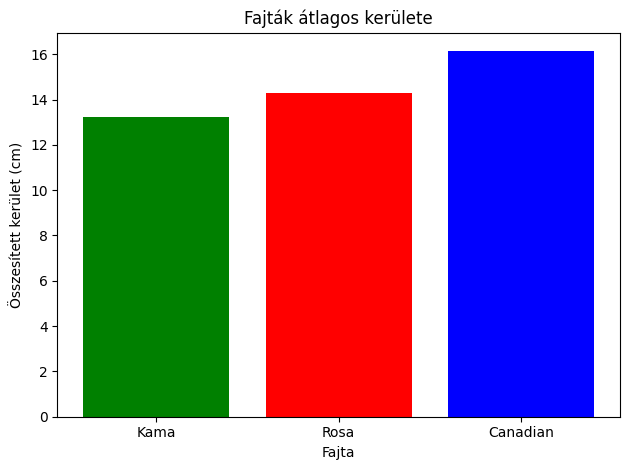

In [6]:
# Színek definiálása fajtánként
labels = df['buza_fajtaja'].unique().tolist()
sizes = df.groupby('buza_fajtaja')['kerulet'].mean().tolist()
colors = ['green', 'red', 'blue']

plt.bar(labels, sizes, color=colors)

# Címek és címkék hozzáadása
plt.title("Fajták átlagos kerülete")
plt.xlabel("Fajta")
plt.ylabel("Összesített kerület (cm)")

# Diagram megjelenítése
plt.tight_layout() # elhelyezi a diagrammokat megfelelően
plt.show()

array([[<Axes: title={'center': 'szemhossz'}>,
        <Axes: title={'center': 'szem_szelesseg'}>]], dtype=object)

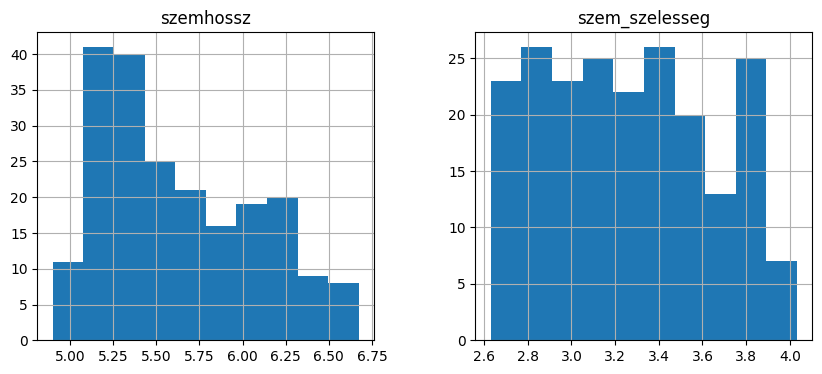

In [7]:
features = ['szemhossz', 'szem_szelesseg']
df[features].hist(figsize=(10,4)) # hisztogramm --> param: 10 széles 4 magas

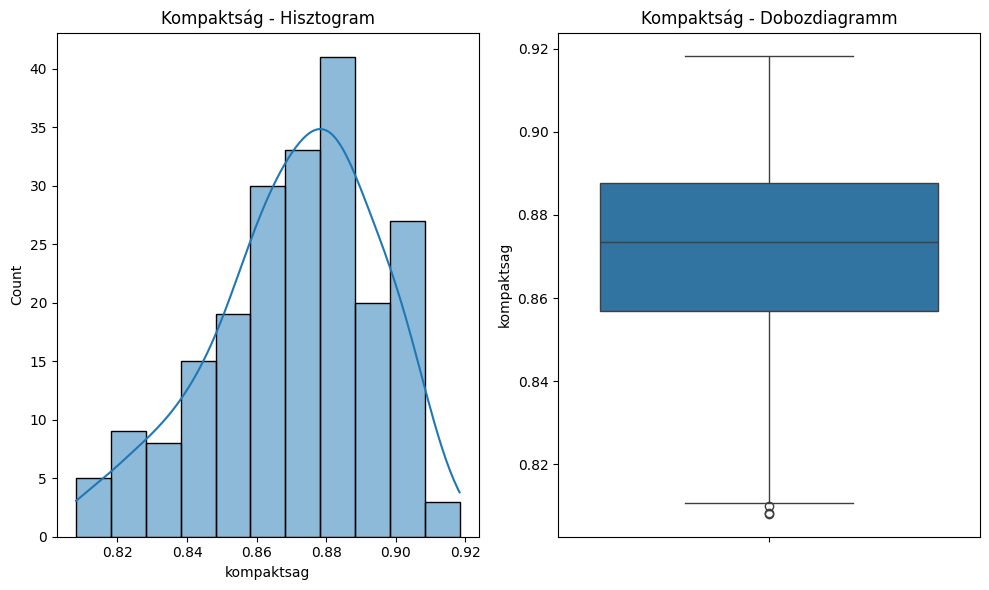

In [8]:
# Ábra létrehozása 1 sorban és 2 oszlopban eltérő méretekkel
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Hisztogram
sns.histplot(df['kompaktsag'], kde=True, ax=axes[0]) #kde - görbét is rajzol
axes[0].set_title('Kompaktság - Hisztogram')

# Boxplot (vízszintes)
sns.boxplot(y=df['kompaktsag'], ax=axes[1]) # y tengely megadásával hosszára rajzolja ki
axes[1].set_title('Kompaktság - Dobozdiagramm')

# Ábra megjelenítése
plt.tight_layout() # elhelyezi a diagrammokat megfelelően
plt.show()

<Axes: >

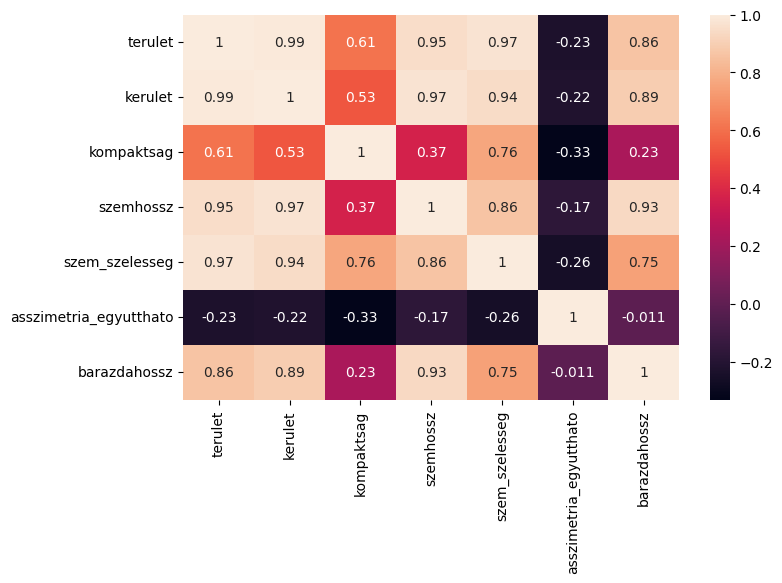

In [9]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = corr_matrix.drop('osztalycimke',axis=0)
corr_matrix = corr_matrix.drop('osztalycimke',axis=1)
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr_matrix,annot=True,ax=ax) # annot --> értékek is jelölve vannak

<Axes: xlabel='szemhossz', ylabel='barazdahossz'>

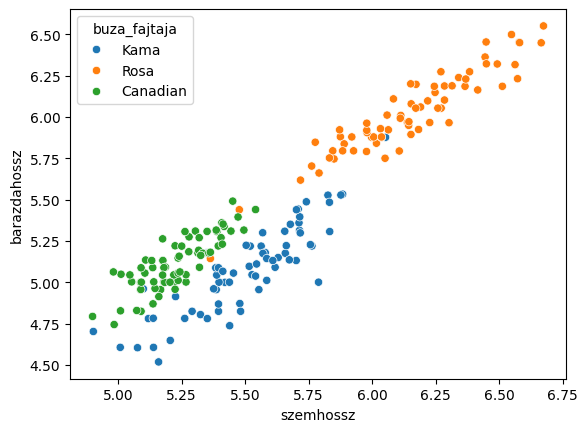

In [137]:
sns.scatterplot(data=df,x='szemhossz',y='barazdahossz', hue='buza_fajtaja')

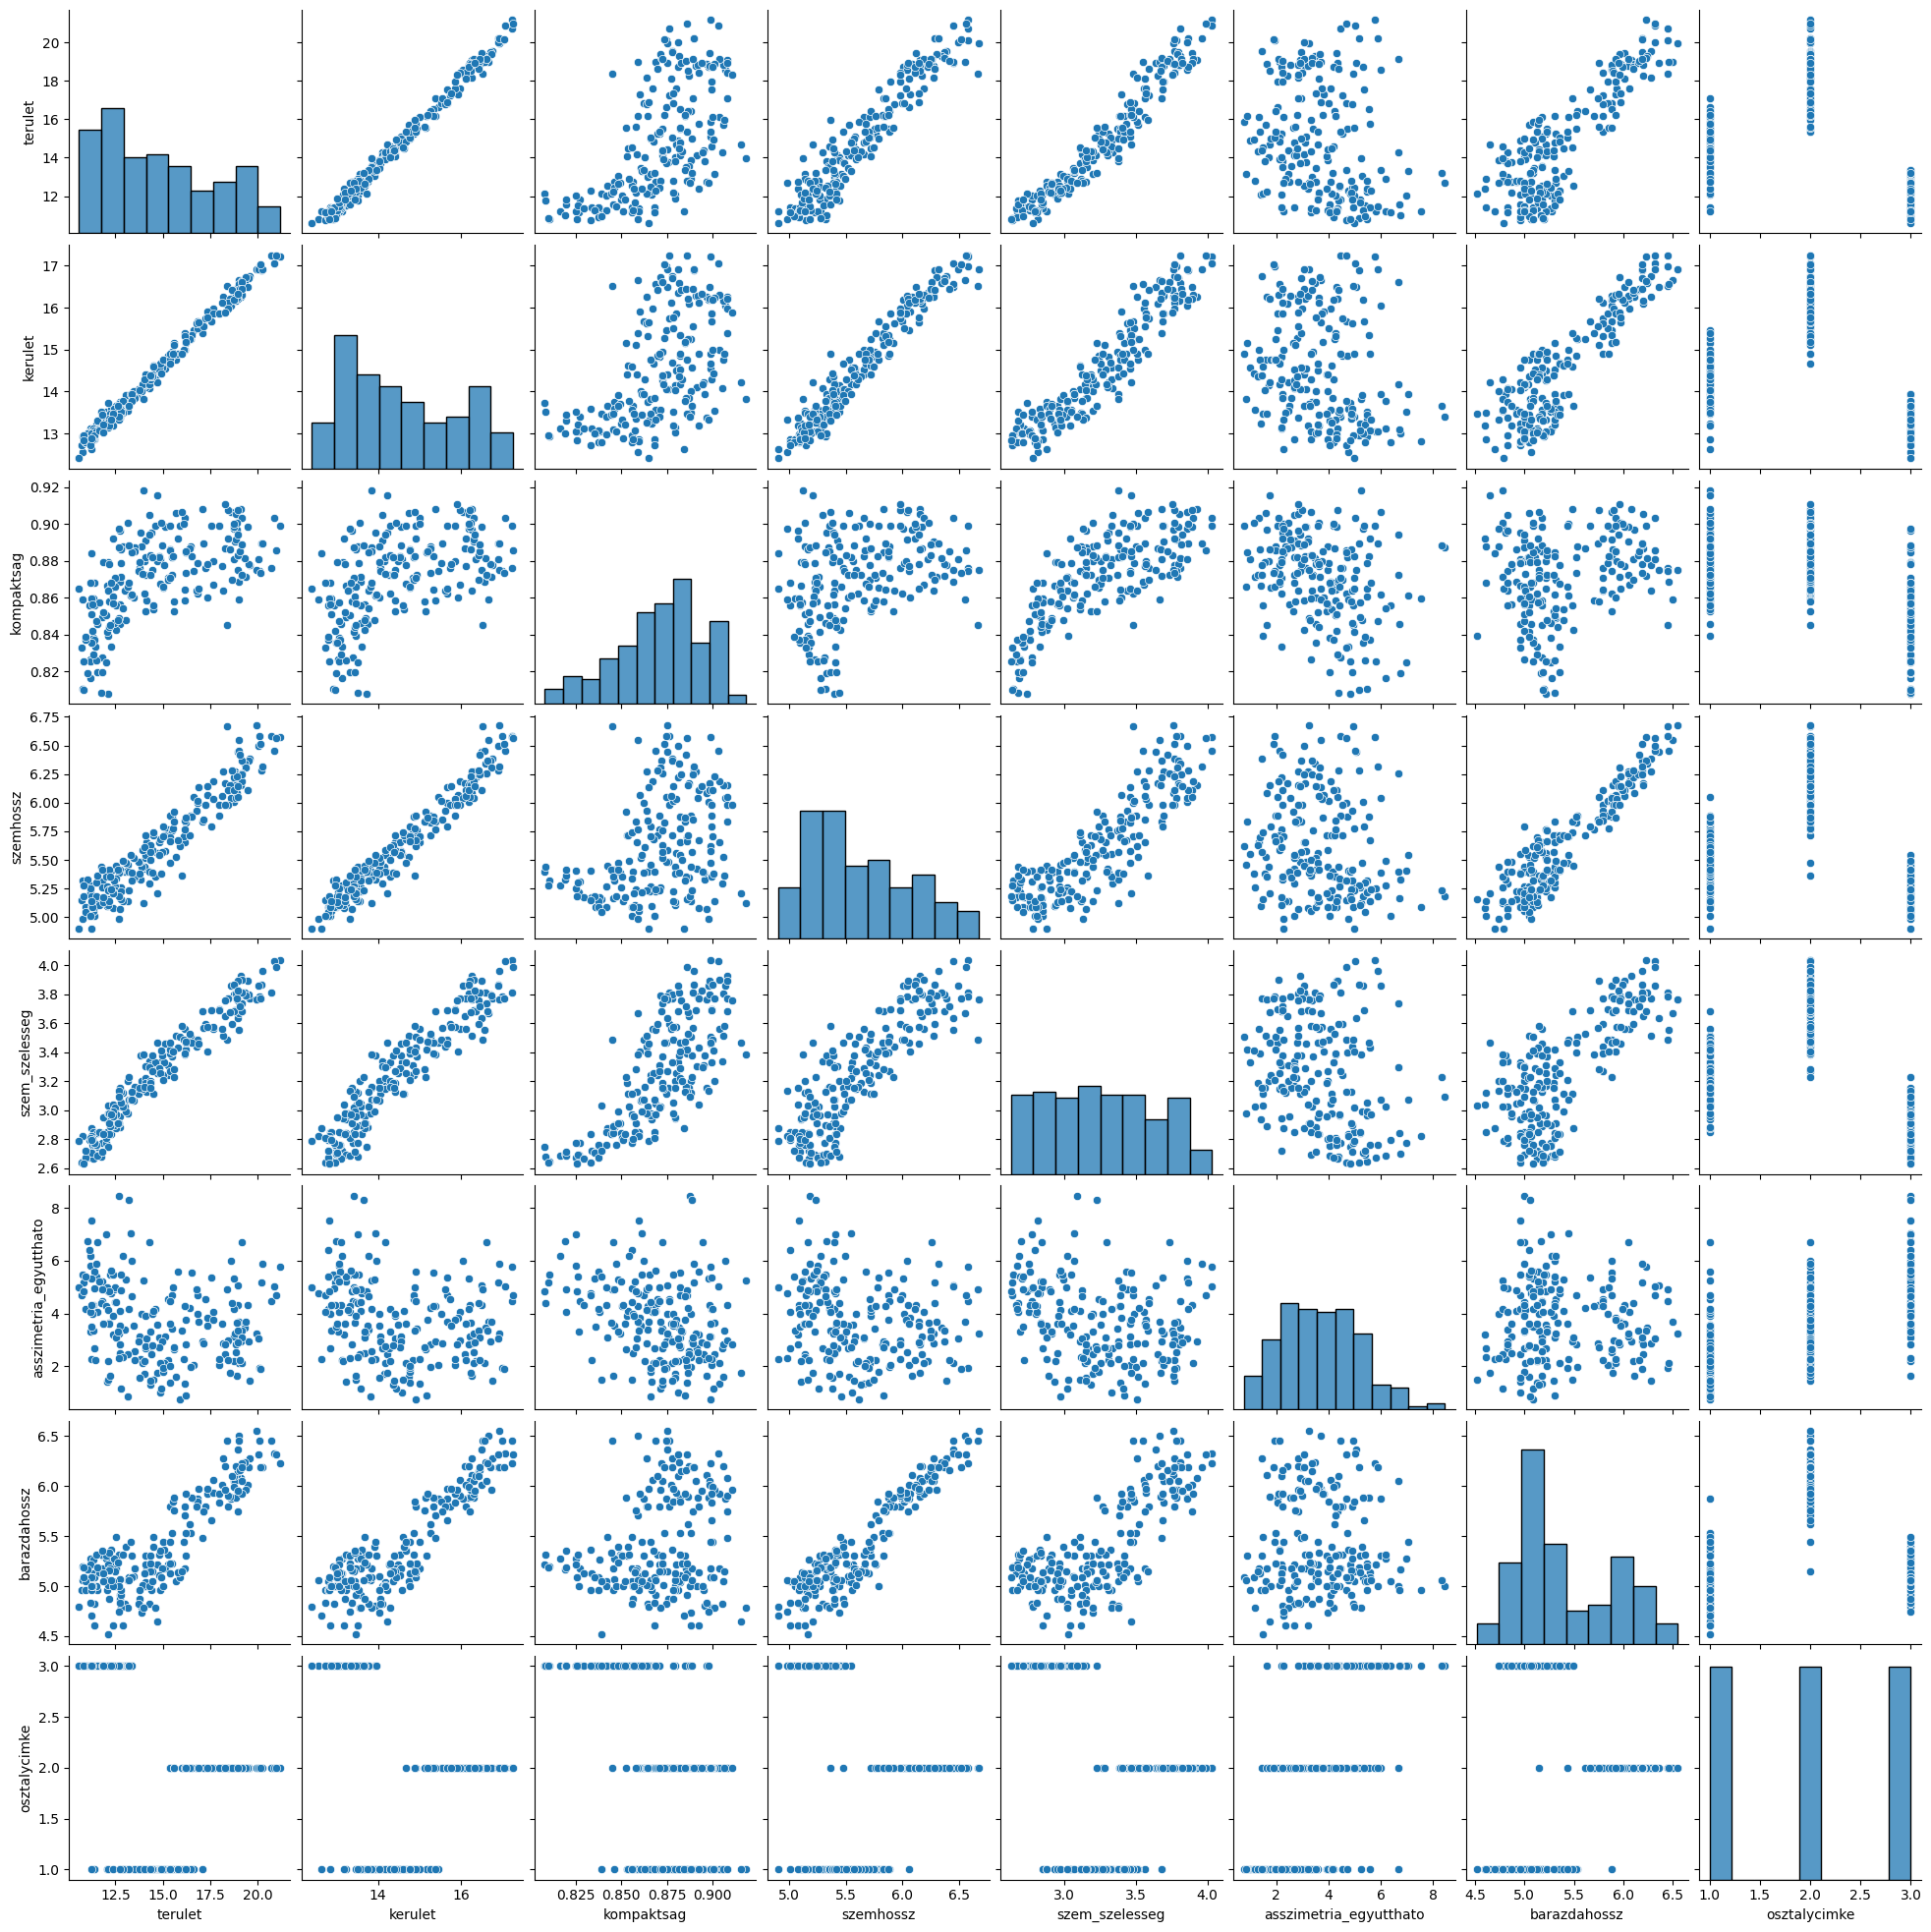

In [11]:
# Csak a numerikus típusú oszlopok kiválasztása
numeric_df = df.select_dtypes(include='number')
sns.pairplot(numeric_df)

C:\Users\laszl\miniconda3\envs\prog1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


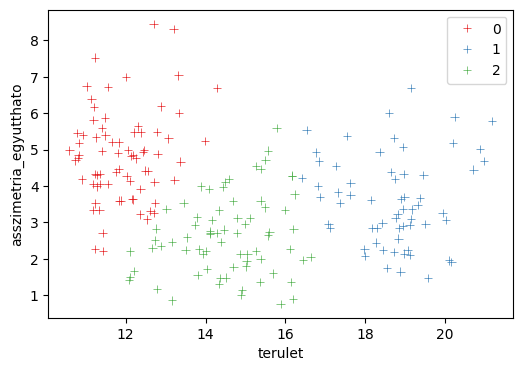

In [90]:
features = ['terulet','asszimetria_egyutthato']
kkozep_df = df[features]
kmeans = KMeans(n_clusters=3)
kmeans.fit(kkozep_df);

plt.figure(figsize=(6,4))
sns.scatterplot(x=kkozep_df['terulet'], y=kkozep_df['asszimetria_egyutthato'], hue=kmeans.labels_, palette="Set1", marker='+'); # pontok kirajzolása

<Axes: xlabel='kompaktsag', ylabel='barazdahossz'>

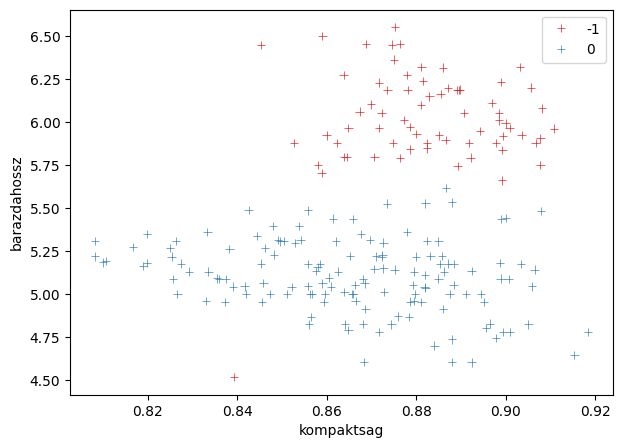

In [139]:
features = ['kompaktsag','barazdahossz']
dbscan_clusters = df[features]
db = DBSCAN(eps=0.25,min_samples=60) # eps: adatpontok közti max távolság, min samples: a középpont körüli pontok minimális értéke
db.fit(dbscan_clusters)
plt.figure(figsize=(7,5))
sns.scatterplot(x=dbscan_clusters['kompaktsag'], y=dbscan_clusters['barazdahossz'], marker='+', hue=db.labels_, palette="Set1")

In [16]:
df['szem_szelesseg2'] = df['szem_szelesseg']**2
lin_reg_x = df[['szem_szelesseg','szem_szelesseg2']].to_numpy()
lin_reg_y = df['kompaktsag'].to_numpy()

reg = LinearRegression()
reg.fit(lin_reg_x,lin_reg_y) #regresszió lefuttatása

LinearRegression()

In [17]:
theta0 = reg.intercept_
theta1 = reg.coef_[0]
theta2 = reg.coef_[1]
h = theta0 + theta1 * df['szem_szelesseg'] + theta2 * df['szem_szelesseg2']  # becsült y

<Axes: xlabel='szem_szelesseg', ylabel='kompaktsag'>

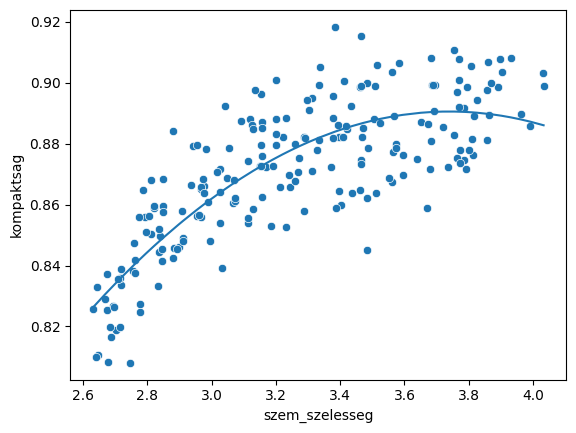

In [18]:
sns.scatterplot(x=df['szem_szelesseg'],y=df['kompaktsag'])
sns.lineplot(x=df['szem_szelesseg'],y=h)

In [19]:
r2 = r2_score(df['kompaktsag'], h)
print("R²:", r2)

R²: 0.6675923192313233


In [20]:
lin_reg_x = df[['szem_szelesseg','terulet']].to_numpy()
lin_reg_y = df['kompaktsag'].to_numpy()

reg = LinearRegression()
reg.fit(lin_reg_x,lin_reg_y) #regresszió lefuttatása

LinearRegression()

In [21]:
theta0 = reg.intercept_
theta1 = reg.coef_[0]
theta2 = reg.coef_[1]
h = theta0 + theta1 * df['szem_szelesseg'] + theta2 * df['terulet']  # becsült y

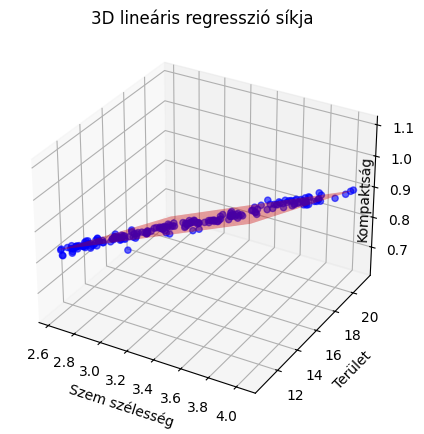

In [22]:
# 1. Ábra létrehozása
fig = plt.figure(figsize=(7, 5))  # Létrehozza a 3D ábrát, 7x5 colos méretben
ax = fig.add_subplot(111, projection='3d')  # Hozzáad egy 3D-s subplotot az ábrához

# 2. Eredeti adatpontok lekérése és kimentése
x = df['szem_szelesseg']  # X tengely adatainak lekérése (szem szélesség)
y_ = df['terulet']  # Y tengely adatainak lekérése (terület)
z = df['kompaktsag']  # Z tengely adatainak lekérése (kompaktság)
ax.scatter(x, y_, z, c='blue', marker='o', alpha=0.6)  # Az adatpontok kirajzolása kék színnel, félátlátszó pontokkal

# 3. Regressziós sík kiszámítása
x_surf, y_surf = np.meshgrid(np.linspace(x.min(), x.max(), 30),  # Az X és Y tengelyekre egy rácsot készítünk
                             np.linspace(y_.min(), y_.max(), 30))  # 30x30-as elrendezésben, a minimum és maximum értékek alapján
z_surf = reg.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)  # A regressziós modell kiszámítja a z értékeket, majd átalakítjuk a megfelelő formátumra

# 4. Sík kirajzolása
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.4)  # A regressziós sík kirajzolása piros színnel, 40%-os átlátszósággal
ax.zaxis.labelpad = -25  # A Z tengely feliratának eltolása, hogy ne lógjon ki az ábrából

# 5. Tengelyek beállítása
ax.set_xlabel('Szem szélesség')  # X tengely felirata
ax.set_ylabel('Terület')  # Y tengely felirata
ax.set_zlabel('Kompaktság')  # Z tengely felirata
ax.set_title('3D lineáris regresszió síkja')  # Az ábra címe

# 6. Az ábra megjelenítése
plt.show()  # Az ábra megjelenítése

In [59]:
r2 = r2_score(df['kompaktsag'], h)
print("R²:", r2)

R²: 0.8783803419575055


In [60]:
log_regression_x = df[['szemhossz','barazdahossz']].to_numpy()
log_regression_y = df['buza_fajtaja'].to_numpy()
reg = LogisticRegression()
reg.fit(log_regression_x,log_regression_y)

LogisticRegression()

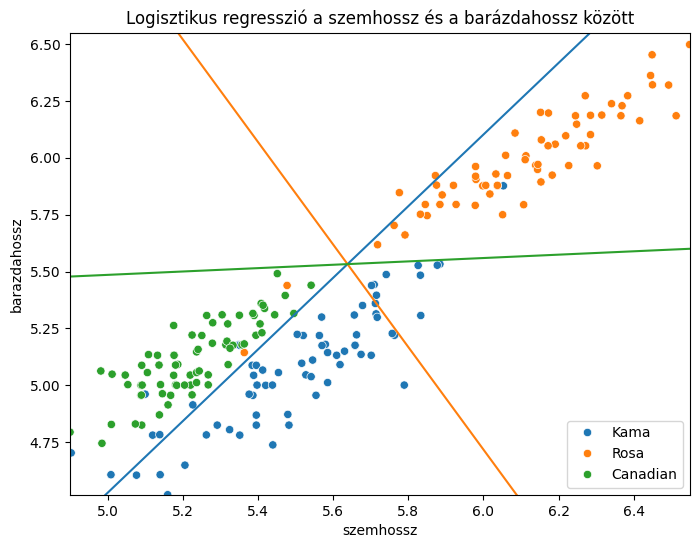

In [67]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['szemhossz'], y=df['barazdahossz'], hue=df['buza_fajtaja'])

# Osztálypárok közötti döntési határok
for i, j in [(0, 1), (0, 2), (1, 2)]:

    # Döntési határegyenlet kiszámítása
    theta0 = reg.intercept_[i] - reg.intercept_[j]
    theta1 = reg.coef_[i, 0] - reg.coef_[j, 0]
    theta2 = reg.coef_[i, 1] - reg.coef_[j, 1]

    y_vals = -(theta0 + theta1 * df['szemhossz']) / theta2 # logisztikus regresszió y pontjainak a kiszámítása
    sns.lineplot(x=df['szemhossz'], y=y_vals)

# Tengelyhossz beállítása
plt.ylim(df['barazdahossz'].min(), df['barazdahossz'].max())
plt.xlim(df['szemhossz'].min(), df['barazdahossz'].max())
plt.title('Logisztikus regresszió a szemhossz és a barázdahossz között')
plt.show()


In [62]:
accuracy = reg.score(log_regression_x, log_regression_y)
print(f"Pontosság (edzésadatokon): {accuracy:.2%}")

Pontosság (edzésadatokon): 94.76%


In [79]:
log_regression_x = df[['terulet','asszimetria_egyutthato']].to_numpy()
log_regression_y = df['buza_fajtaja'].to_numpy()
reg = LogisticRegression()
reg.fit(log_regression_x,log_regression_y)


LogisticRegression()

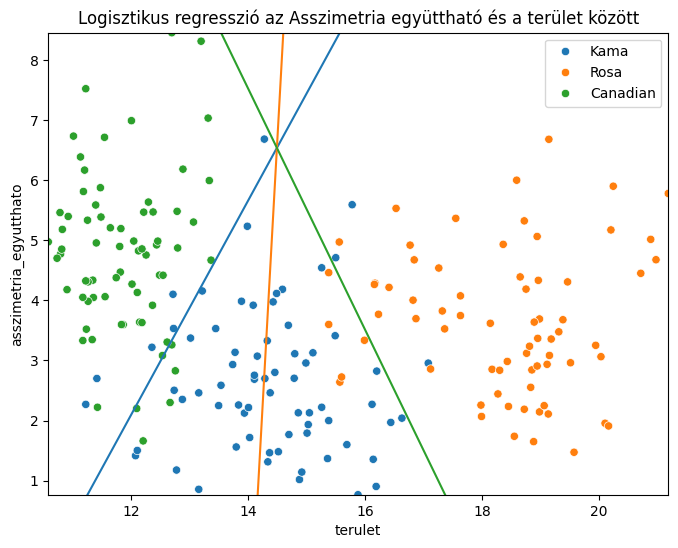

In [84]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['terulet'], y=df['asszimetria_egyutthato'], hue=df['buza_fajtaja'])

# Osztálypárok közötti döntési határok
for i, j in [(0, 1), (0, 2), (1, 2)]:

    # Döntési határegyenlet kiszámítása
    theta0 = reg.intercept_[i] - reg.intercept_[j]
    theta1 = reg.coef_[i, 0] - reg.coef_[j, 0]
    theta2 = reg.coef_[i, 1] - reg.coef_[j, 1]

    y_vals = -(theta0 + theta1 * df['terulet']) / theta2 # logisztikus regresszió y pontjainak a kiszámítása
    sns.lineplot(x=df['terulet'], y=y_vals)

# Tengelyhossz beállítása
plt.ylim(df['asszimetria_egyutthato'].min(), df['asszimetria_egyutthato'].max())
plt.xlim(df['terulet'].min(), df['terulet'].max())
plt.title('Logisztikus regresszió az Asszimetria együttható és a terület között')
plt.show()

In [81]:
accuracy = reg.score(log_regression_x, log_regression_y)
print(f"Pontosság (edzésadatokon): {accuracy:.2%}")

Pontosság (edzésadatokon): 90.95%
